In [1]:


from sklearn.pipeline import Pipeline
##feature pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random


from sklearn.model_selection import (train_test_split, RandomizedSearchCV, 
                                     RepeatedStratifiedKFold, cross_validate)

# Assemble pipeline(s)
from sklearn import set_config
from sklearn.pipeline import make_pipeline, Pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Handle constant/duplicates and missing features/columns
from feature_engine.selection import (DropFeatures, DropConstantFeatures, 
                                      DropDuplicateFeatures)

# Sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Models
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.inspection import permutation_importance
from scipy.stats import loguniform

set_config(display="diagram")  # make pipeline visible

In [2]:
df = pd.read_excel('data/DATASET_Updated-v3.xlsx')
# df.to_csv('v3_data.csv')
# df.reset_index(drop = True).head()
# df.head()

In [3]:
df.columns

Index(['Year Graduated', 'Graduation Term', 'Course/Major',
       'What honor's have you received during college days?',
       'Did you received any Latin Honors after Graduation?',
       'Are you involved in any Student Organization during your college days?',
       'How many academic award certifications have you received during your college days?',
       'How many technical certifications have you received during your college days?',
       'Do you have any portfolio related to your course/ major when you applied for your first job?',
       'Technical Skills (Please select the option that best describes your skill set after graduation)',
       'Is your first job aligned with the programs/courses offered by the SOC/CICT?',
       'What is your employment status 1 year after graduation?',
       'How long did it take before you got hired right after graduation?',
       'How many interviews did you go through before landing your first job after graduation?',
       'How many jo

In [4]:
df['What is your employment status 1 year after graduation?'].unique()

array(['Full time', 'Unemployed', 'Contractual', 'Part time',
       'Business Owner'], dtype=object)

In [5]:
df['What is your employment status 1 year after graduation?'] = df['What is your employment status 1 year after graduation?'].apply(lambda x: 'Employable' if x in ['Full time','Contractual', 'part time'] else 'Less Employable')


In [6]:
for col in df.columns:
    df[col] = df[col].astype('str')
    df[col] = df[col].astype('category')
    

In [7]:
input_cols = ['Year Graduated', 'Graduation Term', 'Course/Major',"What honor's have you received during college days?",'Did you received any Latin Honors after Graduation?',
'Are you involved in any Student Organization during your college days?','How many academic award certifications have you received during your college days?',
'How many technical certifications have you received during your college days?','Do you have any portfolio related to your course/ major when you applied for your first job?',
'Technical Skills (Please select the option that best describes your skill set after graduation)']

In [8]:
#Extracting X and y
y = df[['What is your employment status 1 year after graduation?']]
# X = df.drop(['What is your employment status 1 year after graduation?'], axis = 1)
X = df[input_cols]

In [9]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train , y_test = train_test_split(X, y , test_size = 0.33 , random_state = 42)

In [10]:
# Linear model (logistic regression)
lr = LogisticRegression(warm_start=True, max_iter=400)
# RandomForest
rf = RandomForestClassifier()
# XGB
xgb = XGBClassifier(tree_method="hist", verbosity=0, silent=True)
# Ensemble
lr_xgb_rf = VotingClassifier(estimators=[('lr', lr), ('xgb', xgb), ('rf', rf)],  voting='soft')

In [11]:
ppl = imbPipeline([ # It would crash with the Pipeline object from sklearn
    # Step 1: Drop irrelevant columns/features
#     ('drop_columns', DropFeatures(['subscriptionid'])),
#     ('drop_constant_values', DropConstantFeatures(tol=1, missing_values='ignore')),
#     ('drop_duplicates', DropDuplicateFeatures()),
    
    # Step 2: Impute and scale columns/features
    ('cleaning', ColumnTransformer([
        # Step 2.1: Apply steps for numerical features
        ('num',make_pipeline(
            SimpleImputer(strategy='mean'),
            MinMaxScaler()),
         make_column_selector(dtype_include='int64')
        ),
        # Step 2.2 Apply steps for categorial features
        ('cat',make_pipeline(
            SimpleImputer(strategy='most_frequent'),
            OneHotEncoder(sparse=False, handle_unknown='ignore')),
         make_column_selector(dtype_include='category')
        )])
    ),
    
    # Step 3: Sampling
#     ('smote', SMOTE()),
    
    # Step 4: Voting Classifier
    ('ensemble', lr_xgb_rf)
])

In [12]:
#visualizing pipeline
from sklearn import set_config

set_config(display = 'diagram')

In [13]:
ppl.fit(X_train,y_train.values.ravel())

c:\users\codeg\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('cleaning',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001A2085E3D30>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(h...
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None, ...)),
                                              ('rf', RandomForestClassifier())],
                                  voting='soft'))])

In [14]:
ppl.fit(X_train,y_train.values.ravel())

c:\users\codeg\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('cleaning',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001A2085E3D30>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(h...
                                                             interaction_constraints=None,
                                                             learning_rate=None,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=None,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=100,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None, ...)),
                                              ('rf', RandomForestClassifier())],
                                  voting='soft'))])

In [15]:
preds = ppl.predict(X_test)

In [16]:
from collections import Counter
Counter(preds)

Counter({'Employable': 143, 'Less Employable': 15})

In [17]:
# F1 score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, precision_score , recall_score

confusion_matrix(y_test, preds)
print('F1 Score: %.3f' % f1_score(y_test, preds, pos_label = 'Employable'))
print('Precision: %.3f' % precision_score(y_test, preds,pos_label = 'Employable'))
     	
print('Recall: %.3f' % recall_score(y_test, preds, pos_label = "Employable"))

# Calculate precision, recall, and F1 score
precision =precision_score(y_test, preds,pos_label = 'Employable')
recall = recall_score(y_test, preds, pos_label = "Employable")
f1 =f1_score(y_test, preds, pos_label = 'Employable')

# Create a table to store the results
results_table = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1 Score'],
    'Score': [precision, recall, f1]
})

print(results_table)






F1 Score: 0.932
Precision: 0.909
Recall: 0.956
      Metric     Score
0  Precision  0.909091
1     Recall  0.955882
2   F1 Score  0.931900


Confusion matrix, without normalization
[[130   6]
 [ 13   9]]
Normalized confusion matrix
[[0.95588235 0.04411765]
 [0.59090909 0.40909091]]


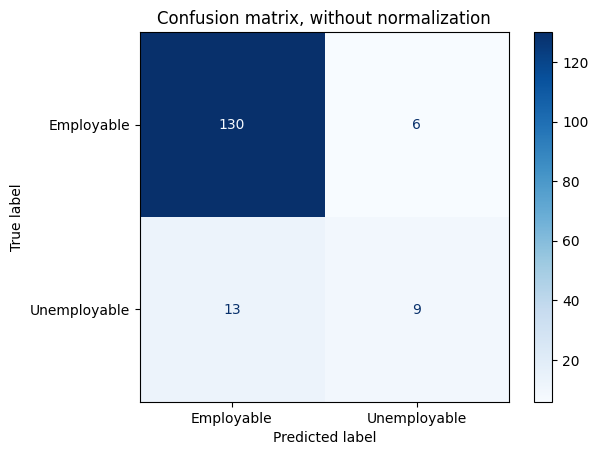

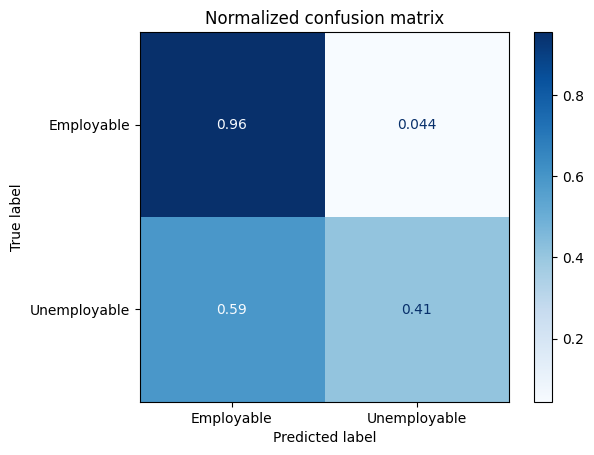

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

class_names = ['Employable', 'Unemployable']

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        ppl,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [19]:
import pickle
with open('my_pipeline.pkl', 'wb') as f:
    pickle.dump(ppl, f)

In [20]:
from sklearn.preprocessing import LabelEncoder

cols = ['Year Graduated', 'Graduation Term', 'Course/Major',"What honor's have you received during college days?",'Did you received any Latin Honors after Graduation?',
'Are you involved in any Student Organization during your college days?','How many academic award certifications have you received during your college days?',
'How many technical certifications have you received during your college days?','Do you have any portfolio related to your course/ major when you applied for your first job?',
'Technical Skills (Please select the option that best describes your skill set after graduation)','What is your employment status 1 year after graduation?']
#
# Encode labels of multiple columns at once
#
df[cols] = df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
df.head()

#Extracting X and y
y = df[['What is your employment status 1 year after graduation?']]
# X = df.drop(['What is your employment status 1 year after graduation?'], axis = 1)
X = df[input_cols]

In [21]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train , y_test = train_test_split(X, y , test_size = 0.33 , random_state = 42)

In [22]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# logistic regression
model1 = LogisticRegression()
# knn
model2 = XGBClassifier()
model3 = RandomForestClassifier()
# model3 = 
# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)

c:\users\codeg\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\codeg\AppData\Local\Temp\ipykernel_11600\3544956992.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_train, y_train)


In [23]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [24]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2, auc_score3)

0.686831550802139 0.8375668449197862 0.8375668449197862


C:\Users\codeg\AppData\Local\Temp\ipykernel_11600\470174200.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


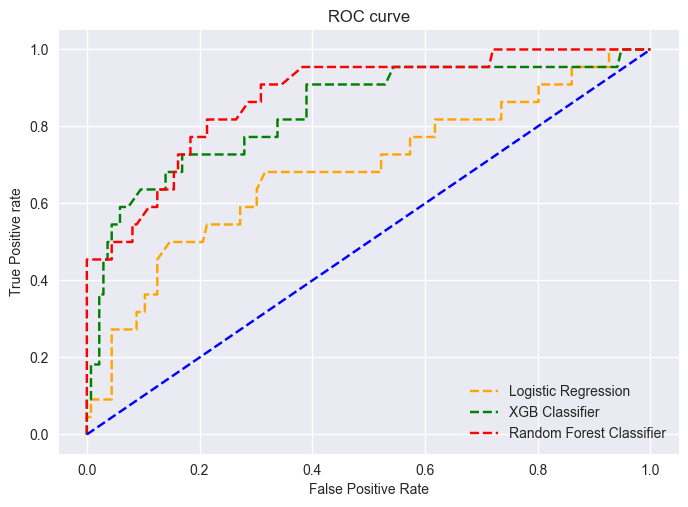

In [25]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='XGB Classifier')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Random Forest Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();